 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [143]:
# Import Libraries

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# Set csv paths of Portfolios and S&P 500

whale_path = Path('whale_returns.csv')
algo_path = Path('algo_returns.csv')
sp500_path = Path('sp500_history.csv')


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [16]:
# Reading whale returns

whale_path = Path('whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True).sort_index()
whale_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [17]:
# Count nulls

whale_df.isnull().sum ()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [153]:
# Drop nulls

whale_df = whale_df.dropna()

# Validate no more missing values

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [145]:
# Reading algorithmic returns

algo_path = Path('algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True).sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [20]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [154]:
# Drop nulls

algo_df = algo_df.dropna()

# Validate no more missing values
algo_df.isnull().sum()



Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [147]:
# Reading S&P 500 Closing Prices

sp500_path = Path('sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, date_format='%d-%b-%y').sort_index()
sp500_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [163]:
# Calculate Daily Returns 

# Reading S&P 500 Closing Prices

sp500_path = Path('sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, parse_dates=True, index_col='Date', thousands=',', dtype={'Close': str}).sort_index()

# Fix Data Types

sp500_df['Close'] = sp500_df['Close'].replace('[\$,]', '', regex=True).astype(float)

# Calculate Daily Returns

sp500_daily_return = sp500_df.pct_change()

# Drop nulls

sp500_daily_return = sp500_daily_return.dropna()

# Rename `Close` Column to be specific to this portfolio. 

sp500_daily_return  =sp500_daily_return .rename(columns={'Close': 'S&P 500'})
sp500_daily_return .head()

# Display the updated DataFrame

display(sp500_daily_return.head())
display(sp500_daily_return.tail())

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


,S&P 500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [164]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, sp500_daily_return], axis='columns', join='inner')

combined_df = combined_df.dropna()
combined_df.head()

# Rename 'Daily Returns' column to 'S&P 500'
combined_df = combined_df.rename(columns={'Daily Returns': 'S&P 500'})
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

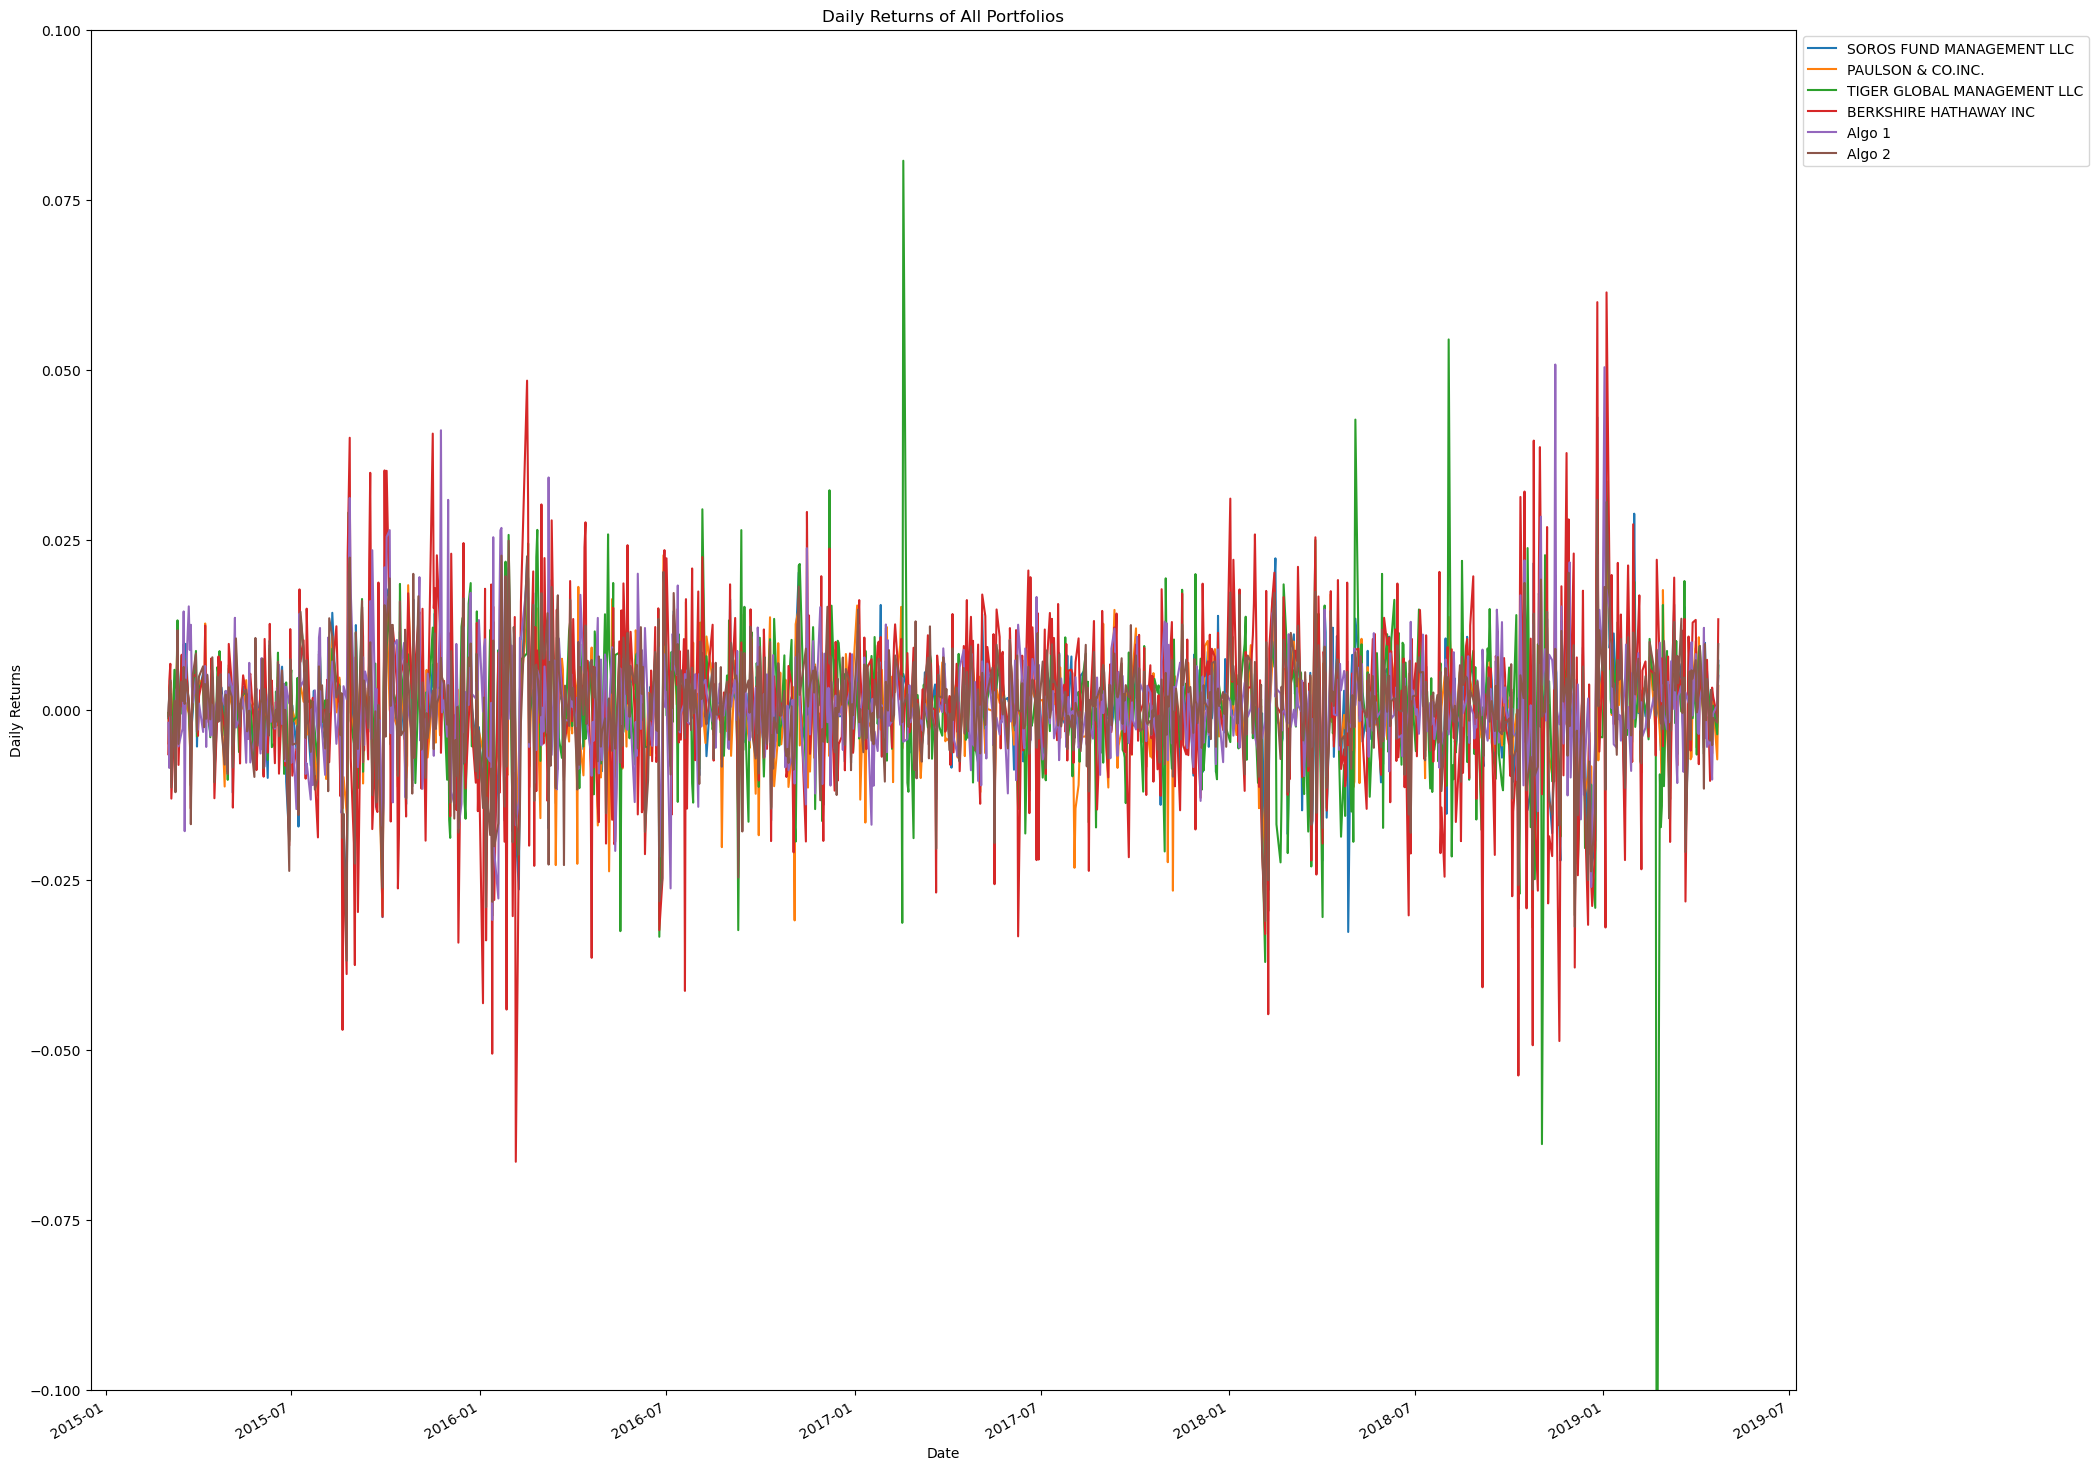

In [26]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(22, 20), title='Daily Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim([-0.1, 0.1])  
plt.show()


#### Calculate and Plot cumulative returns.

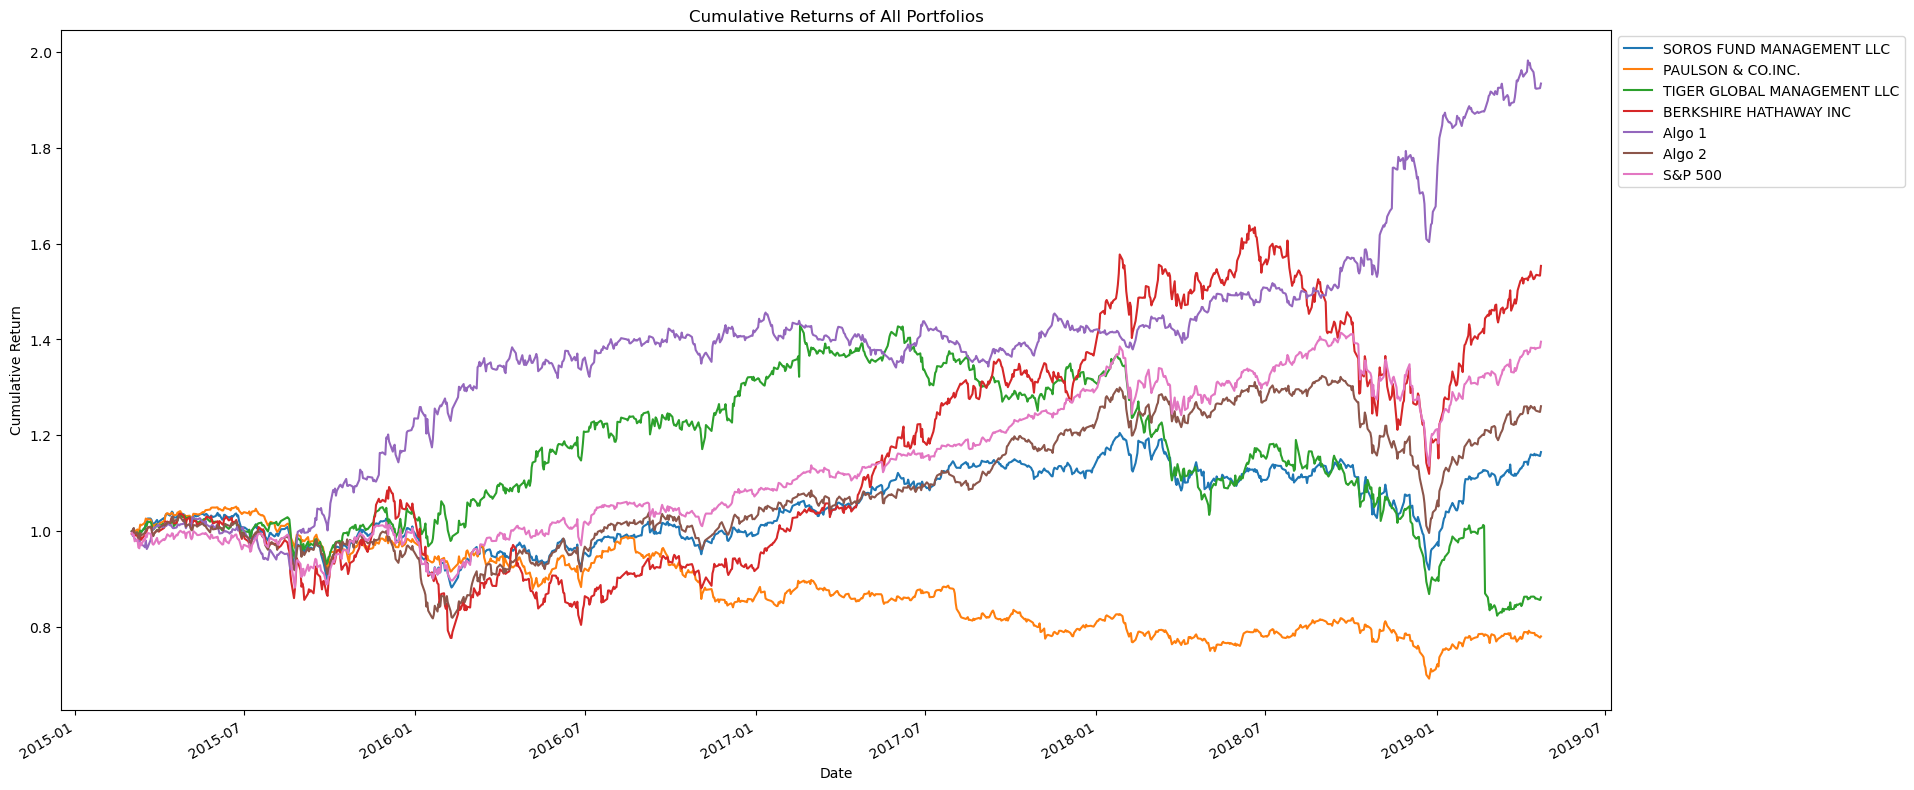

In [175]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

# Plot cumulative returns

cumulative_returns.plot(figsize=(20, 10), title='Cumulative Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


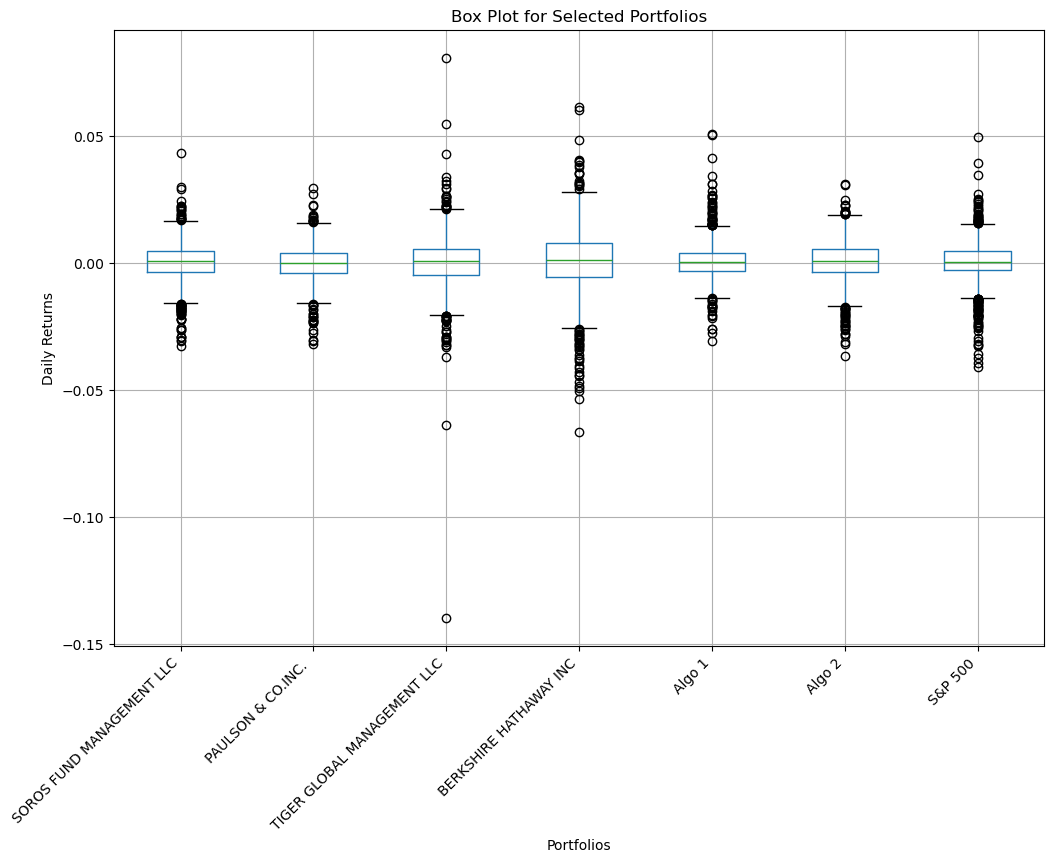

In [166]:
# Box plot to visually show risk

# Create a box plot for selected portfolios with rotated x-axis labels
selected_portfolios = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P 500']

plt.figure(figsize=(12, 8))
combined_df[selected_portfolios].boxplot()
plt.title('Box Plot for Selected Portfolios')
plt.xlabel('Portfolios')
plt.ylabel('Daily Returns')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()


### Calculate Standard Deviations

In [173]:
# Calculate the daily standard deviations of all portfolios

daily_std = combined_df.std().sort_values(ascending=False)
daily_std.head(7)


BERKSHIRE HATHAWAY INC         0.013095
TIGER GLOBAL MANAGEMENT LLC    0.011043
S&P 500                        0.008570
Algo 2                         0.008316
SOROS FUND MANAGEMENT LLC      0.008004
Algo 1                         0.007671
PAULSON & CO.INC.              0.007119
dtype: float64

### Determine which portfolios are riskier than the S&P 500


In [169]:
# Calculate  the daily standard deviation of S&P 500

sp500_daily_std = sp500_daily_return.std()
sp500_daily_std.head()


S&P 500    0.008111
dtype: float64

**The portfolio with the highest standard deviation is BERKSHIRE HATHAWAY INC (0.013095), suggesting higher risk compared to S&P 500.**


### Calculate the Annualized Standard Deviation

In [178]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

BERKSHIRE HATHAWAY INC         0.207884
TIGER GLOBAL MANAGEMENT LLC    0.175308
S&P 500                        0.136047
Algo 2                         0.132007
SOROS FUND MANAGEMENT LLC      0.127053
Algo 1                         0.121780
PAULSON & CO.INC.              0.113015
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

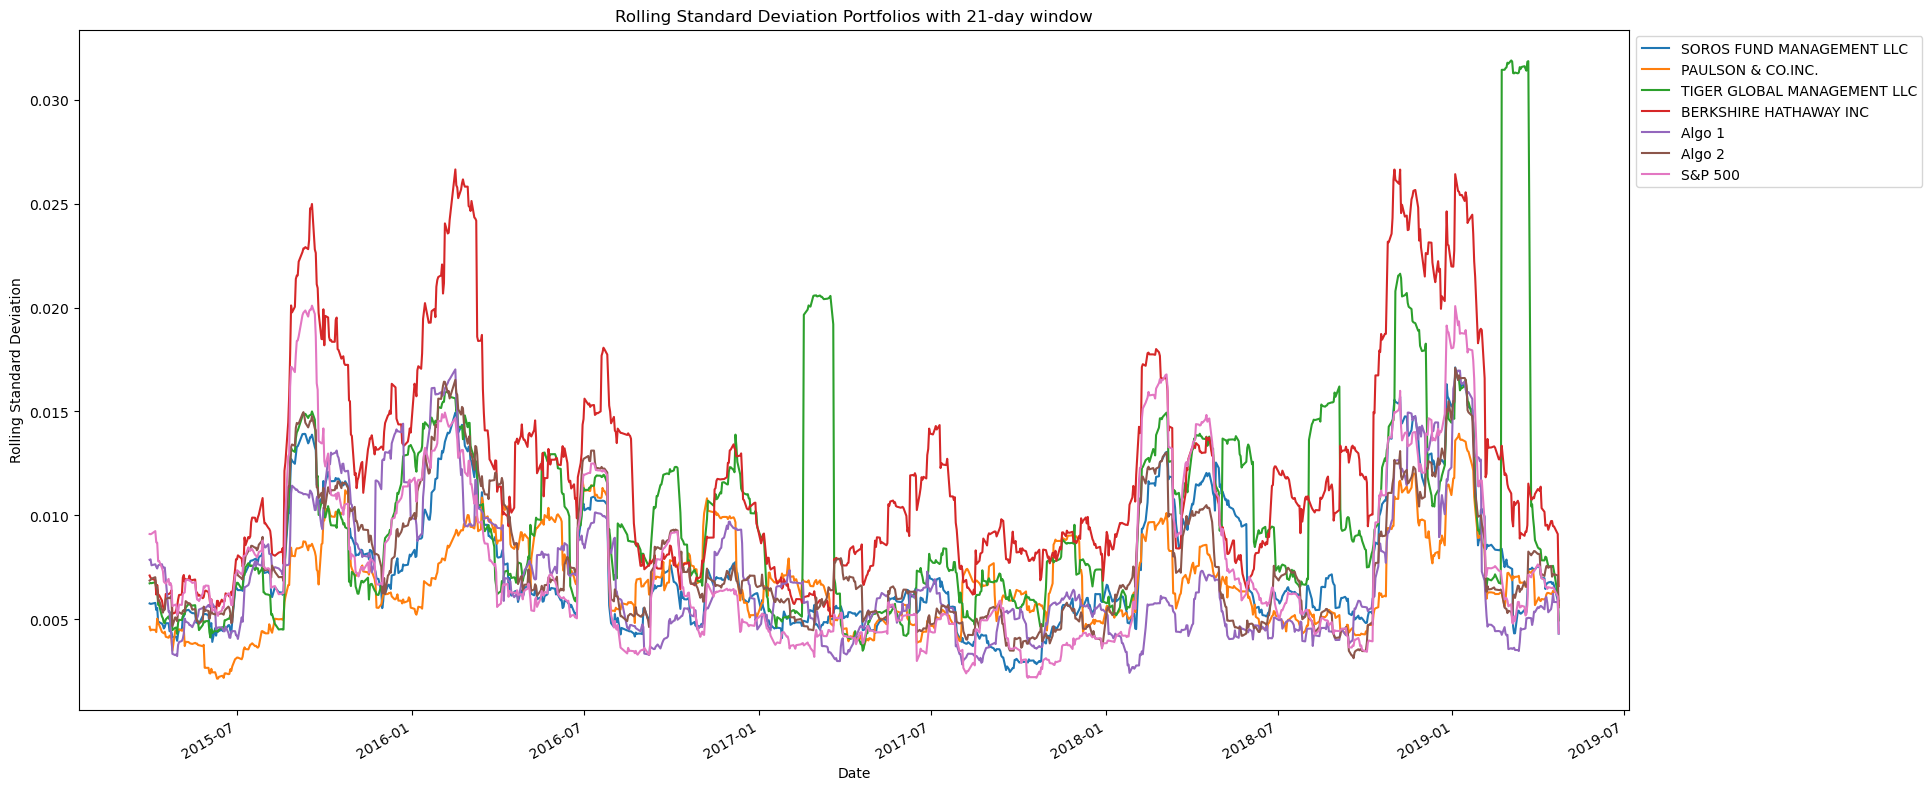

In [190]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_combined = combined_df.rolling(window=21).std()

# Plotting and customizing the plot
ax = rolling_std_combined.plot(figsize=(20, 10), title='Rolling Standard Deviation Portfolios with 21-day window')
ax.set_xlabel('Date')
ax.set_ylabel('Rolling Standard Deviation')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


### Calculate and plot the correlation

In [192]:
# Calculate the correlation

correlation = combined_df.corr()

# Display de correlation matrix
correlation.head(7)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699947,0.561252,0.754357,0.323391,0.840901,0.847690
PAULSON & CO.INC.,0.699947,1.000000,0.434479,0.545674,0.270781,0.689656,0.677679
TIGER GLOBAL MANAGEMENT LLC,0.561252,0.434479,1.000000,0.424441,0.165546,0.516017,0.631304
BERKSHIRE HATHAWAY INC,0.754357,0.545674,0.424441,1.000000,0.293975,0.699768,0.760159
Algo 1,0.323391,0.270781,0.165546,0.293975,1.000000,0.286012,0.276413
Algo 2,0.840901,0.689656,0.516017,0.699768,0.286012,1.000000,0.858647
S&P 500,0.847690,0.677679,0.631304,0.760159,0.276413,0.858647,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [194]:
# Calculate covariance of a single portfolio

# Load the data for Berkshire Hathaway Inc. from 'whale_returns.csv'

whale_returns_path = Path('whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_path, parse_dates=True, index_col='Date').sort_index().dropna()

# Drop rows with missing values
whale_returns_df_dropped = whale_returns_df.dropna()

# BRK daily returns is labeled 'Berkshire Hathaway Inc'
brk_daily_return = whale_returns_df['BERKSHIRE HATHAWAY INC'].dropna()


# Calculate the covariance between BRK and S&P 500
covariance_matrix = pd.concat([brk_daily_return, sp500_daily_return], axis=1).cov()

# Extract the covariance between BRK and S&P 500
cov_brk_sp500 = covariance_matrix.loc['BERKSHIRE HATHAWAY INC', 'S&P 500']

print(f"Covariance between Berkshire Hathaway Inc. and S&P 500: {cov_brk_sp500}")


Covariance between Berkshire Hathaway Inc. and S&P 500: 8.302834941861667e-05


In [195]:
 # Calculate variance of S&P 500

variance_sp500 = sp500_daily_return.var()

print(f"Variance of S&P 500: {variance_sp500}")


Variance of S&P 500: S&P 500    0.000066
dtype: float64


Beta of Berkshire Hathaway Inc. with respect to S&P 500: S&P 500    1.261969
dtype: float64


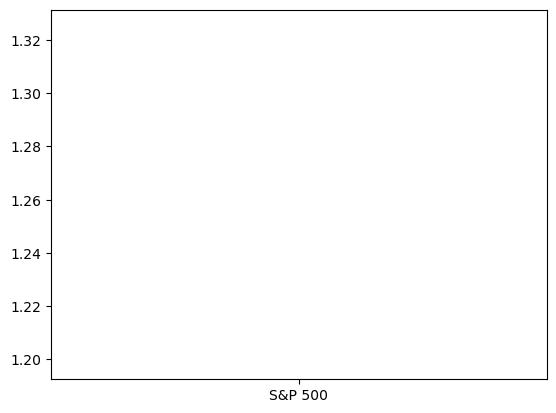

In [196]:
# Computing beta

beta = cov_brk_sp500 / variance_sp500

print(f"Beta of Berkshire Hathaway Inc. with respect to S&P 500: {beta}")

# Plot beta

plt.plot(beta)
# plt.xlabel('Time')
# plt.ylabel('Beta Value')
# plt.title('Beta Value of Berkshire Hathaway Inc. with respect to S&P 500')
# plt.show()


# Check if beta_values is populated correctly
#print(beta_values)


**A beta greater than 1 suggests that the stock tends to have more price volatility than the market. In this case, Berkshire Hathaway Inc. is expected to be slightly more volatile than the S&P 500.**

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [197]:
# Use `ewm` to calculate the rolling window

rolling_window = combined_df.ewm(span=21).std()
rolling_window.head(7)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002658,0.004896,0.002519,0.006934,0.004182,0.002645,0.003342
2015-03-06,0.005515,0.004592,0.004808,0.009585,0.003386,0.007399,0.006714
2015-03-09,0.004716,0.004434,0.005702,0.008103,0.002929,0.006422,0.007332
2015-03-10,0.005961,0.004742,0.007166,0.007819,0.002894,0.007478,0.008792
2015-03-11,0.005995,0.004843,0.006898,0.007045,0.003856,0.006860,0.008033


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [142]:
# Annualized Sharpe Ratios

#sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
#sharpe_ratios

# Calculate the Sharpe ratios
#sharpe_ratios = (brk_daily_return.mean() * 252) / (sp500_daily_return.std() * np.sqrt(252))
#print(f"Sharpe Ratio of Berkshire Hathaway Inc. vs. S&P 500: {sharpe_ratios}")

# Calculate the Sharpe ratio
#sharpe_ratio = (average_return - risk_free_rate) / annualized_std_dev

# Print the Sharpe ratio in the desired format
#print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


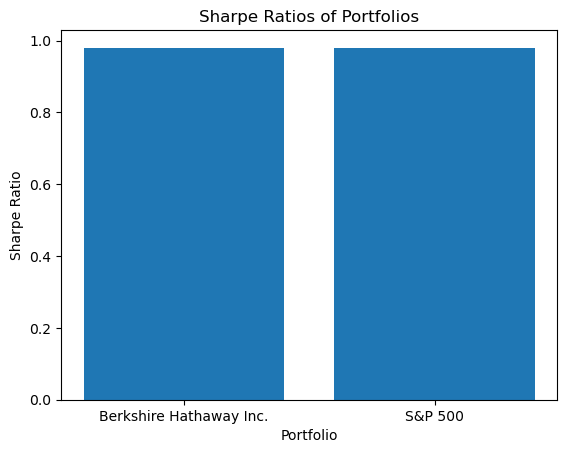

In [138]:
# Visualize the sharpe ratios as a bar plot


# Create a bar plot of the Sharpe ratios
plt.bar(['Berkshire Hathaway Inc.', 'S&P 500'], sharpe_ratios)

# Add labels and title to the plot
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of Portfolios')

# Display the plot
plt.show()




### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic strategies cumative returns has been growing in comparision withe the market and the whales.It means a total gain in an investment over a specified period. In general, positive algorithmic returns are considered a positive outcome, as they indicate that the algorithmic trading strategy generated a profit over a specific period. Positive returns suggest that the strategy's buy and sell signals or trading decisions resulted in gains for the portfolio.

Altough, in reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. While analying the three portfolios, SP500 has a lower shaper ratio, which means a lower risk of investment.

-----

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [222]:
# Reading data from 1st stock

# Set csv paths
bbd_path= ('bbd_history.csv')
bbd_df = pd.read_csv(bbd_path, index_col="Date",parse_dates=True).sort_index()

# Remove 'time' from 'date'
bbd_df.index = bbd_df.index.strftime('%Y-%m-%d')

# Rename 'Close' to Ticker name

bbd_df = bbd_df.rename(columns={'Close': 'BBD'})

# Display a few rows

bbd_df.head()

,BBD
Date,
2015-03-03,4.99
2015-03-04,4.78
2015-03-05,4.71
2015-03-06,4.57
2015-03-09,4.33


In [223]:
# Reading data from 2nd stock

# Set csv paths

itub_path = Path('itub_history.csv')
itub_df = pd.read_csv(itub_path, index_col="Date", parse_dates=True).sort_index()

# Remove 'time' from 'date'
itub_df.index = itub_df.index.strftime('%Y-%m-%d')

# Rename 'Close' to Ticker name

itub_df = itub_df.rename(columns={'Close': 'ITUB'})

# Display a few rows

itub_df.head()

,ITUB
Date,
2015-03-03,5.69
2015-03-04,5.57
2015-03-05,5.40
2015-03-06,5.15
2015-03-09,4.93


In [224]:
# Reading data from 3rd stock

# Set csv paths

pbr_path = Path('pbr_history.csv')
pbr_df = pd.read_csv(pbr_path, index_col="Date", parse_dates=True).sort_index()


# Remove 'time' from 'date'
pbr_df.index = pbr_df.index.strftime('%Y-%m-%d')

# Rename 'Close' to Ticker name

pbr_df = pbr_df.rename(columns={'Close': 'PBR'})

# Display a few rows

pbr_df.head()


,PBR
Date,
2015-03-03,6.41
2015-03-04,6.18
2015-03-05,6.08
2015-03-06,5.96
2015-03-09,5.59


In [225]:
# Combine all stocks in a single DataFrame

combined_stocks_df = pd.concat([bbd_df, itub_df, pbr_df],axis='columns', join='inner')
combined_stocks_df.head()

,BBD,ITUB,PBR
Date,,,
2015-03-03,4.99,5.69,6.41
2015-03-04,4.78,5.57,6.18
2015-03-05,4.71,5.40,6.08
2015-03-06,4.57,5.15,5.96
2015-03-09,4.33,4.93,5.59


In [226]:
# Reset Date index
combined_stocks_df = combined_stocks_df.reset_index()
combined_stocks_df.dtypes


Date     object
BBD     float64
ITUB    float64
PBR     float64
dtype: object

In [227]:
# Calculate daily returns

# Convert columns to numeric

combined_stocks_df[['BBD', 'ITUB', 'PBR']] = combined_stocks_df[['BBD', 'ITUB', 'PBR']].apply(pd.to_numeric, errors='coerce')

# convert 'date' to 'date time'

combined_stocks_df['Date'] = pd.to_datetime(combined_stocks_df['Date'])

portfolio_returns = combined_stocks_df.set_index('Date').pct_change()


# Drop NAs
portfolio_returns = portfolio_returns.dropna()

portfolio_returns.head()


,BBD,ITUB,PBR
Date,,,
2015-03-04,-0.042084,-0.021090,-0.035881
2015-03-05,-0.014644,-0.030521,-0.016181
2015-03-06,-0.029724,-0.046296,-0.019737
2015-03-09,-0.052516,-0.042718,-0.062081
2015-03-10,-0.023095,-0.032454,-0.051878


In [228]:
# Join your returns DataFrame to the original returns DataFrame

portfolio_merge = pd.merge(portfolio_returns,sp500_daily_return,left_index = True, right_index = True)
portfolio_merge.head()

#Rename 'Close' to S&P 500'
portfolio_merge = portfolio_merge.rename(columns={'Close': 'S&P 500'})
portfolio_merge.head().dropna()

,BBD,ITUB,PBR,S&P 500
Date,,,,
2015-03-04,-0.042084,-0.021090,-0.035881,-0.004389
2015-03-05,-0.014644,-0.030521,-0.016181,0.001196
2015-03-06,-0.029724,-0.046296,-0.019737,-0.014174
2015-03-09,-0.052516,-0.042718,-0.062081,0.003944
2015-03-10,-0.023095,-0.032454,-0.051878,-0.016961


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [229]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = portfolio_returns.dot(weights)

# Display sample data
portfolio_returns.head()


Date
2015-03-04   -0.033018
2015-03-05   -0.020449
2015-03-06   -0.031919
2015-03-09   -0.052438
2015-03-10   -0.035809
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [230]:
# Join your returns DataFrame to the original returns DataFrame

portfolio_merge = pd.merge(portfolio_returns,sp500_daily_return,left_index = True, right_index = True)
portfolio_merge.head()

# Rename 'Close' to S&P 500'
portfolio_merge = portfolio_merge.rename(columns={'Close': 'S&P 500'})
portfolio_merge.head().dropna()

ValueError: Cannot merge a Series without a name

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [231]:
# Calculate the annualized `std`

volatility = portfolio_merge.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility


S&P 500    0.168542
ITUB       0.456485
BBD        0.481771
PBR        0.714783
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

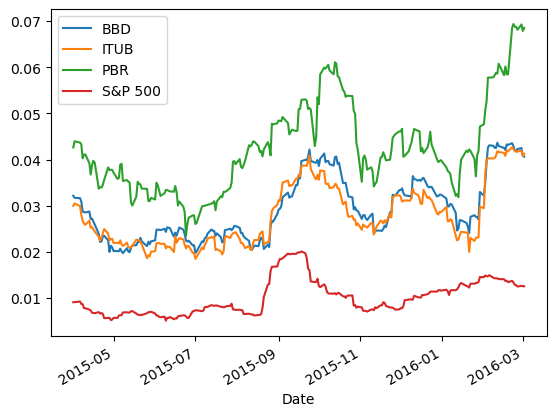

In [232]:
# Calculate rolling standard deviation

portfolio_merge.rolling(window=21).std().plot()

# Plot rolling standard deviation


### Calculate and plot the correlation

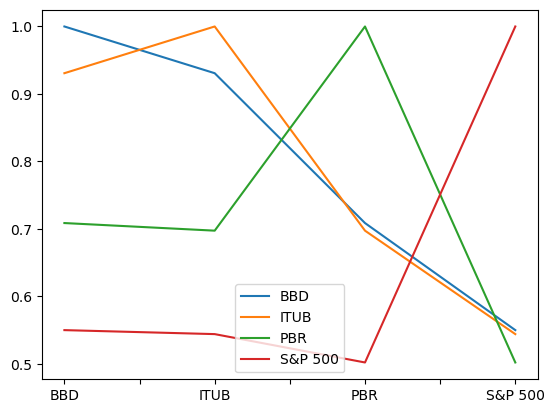

In [233]:
# Calculate and plot the correlation

correlation = portfolio_merge.corr().plot()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of Portfolios'}, xlabel='Date,None'>

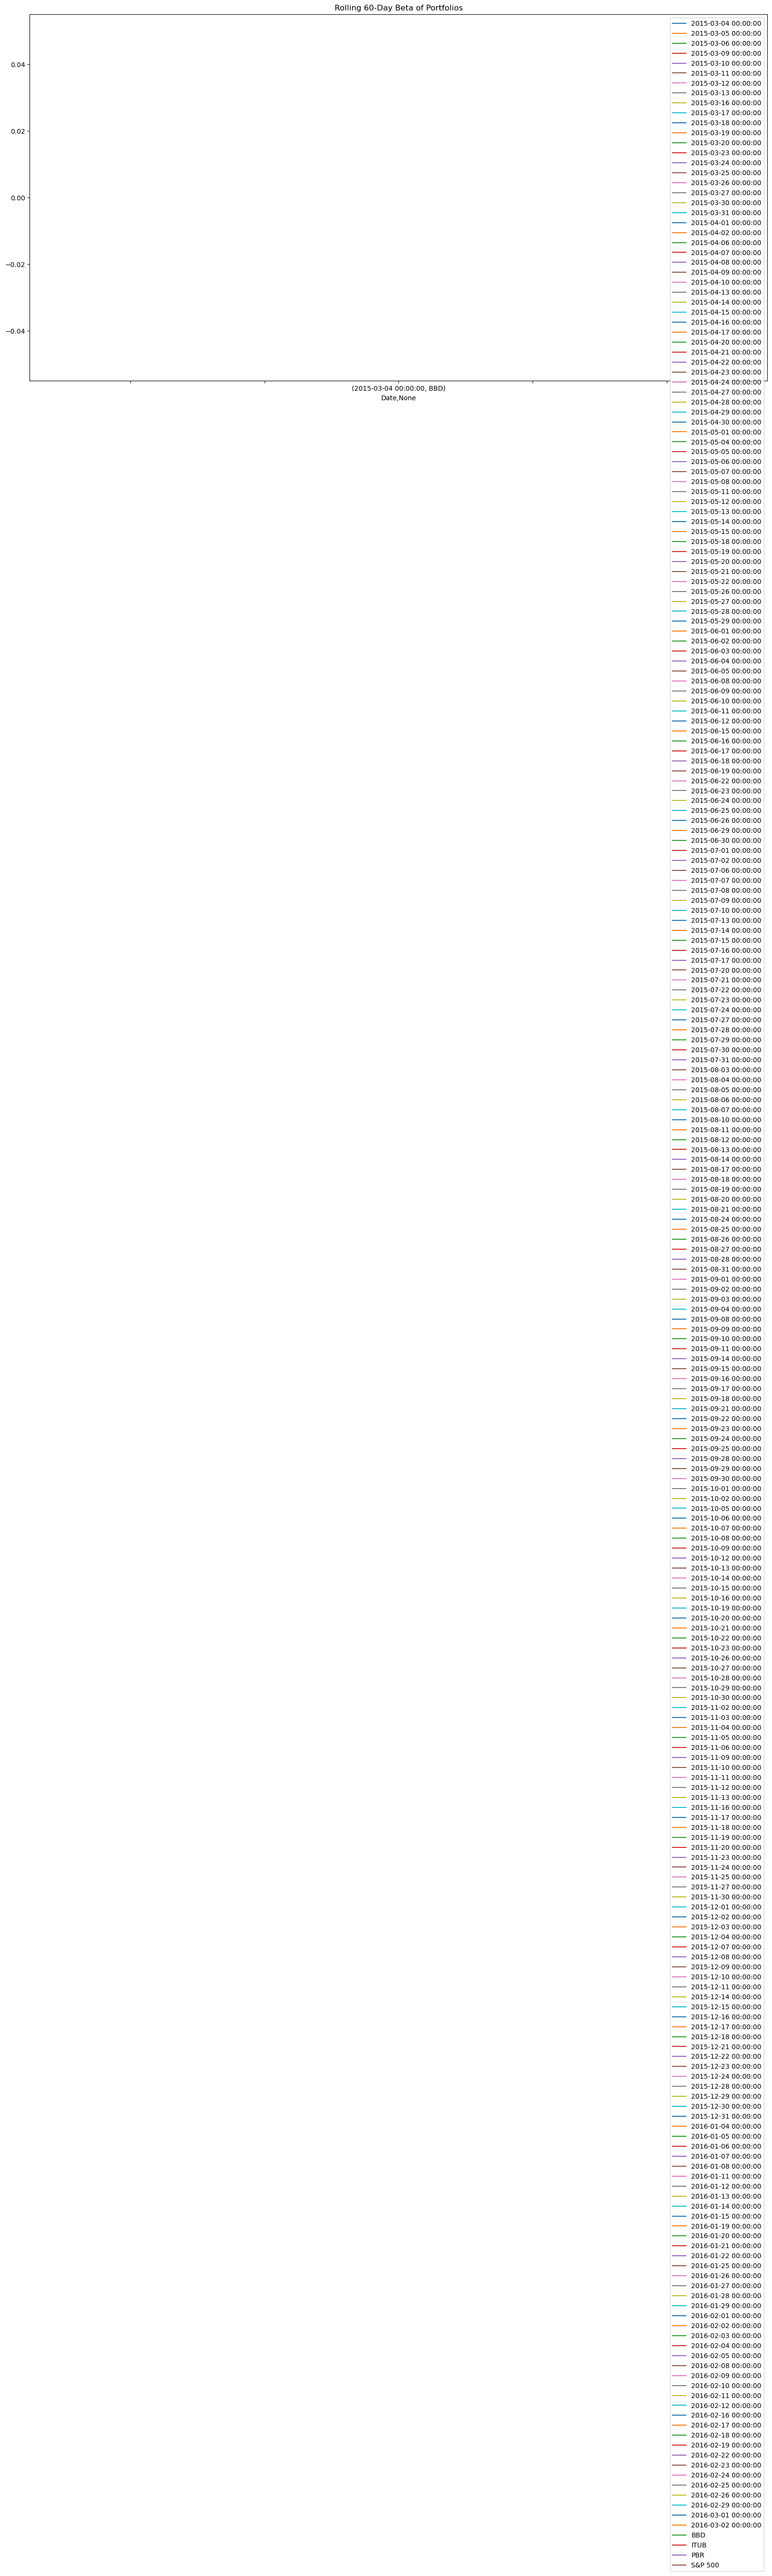

In [107]:
# Calculate and plot Beta

# Calculate rolling covariance of Porfolios vs. S&P 500 

rolling_covariance = portfolio_merge[['BBD', 'ITUB', 'PBR', 'S&P 500']].rolling(window=60).cov()

# Calculate rolling variance of Porfolios vs. S&P 500

rolling_variance = portfolio_merge['S&P 500'].rolling(window=60).var()

# Calculate 60-day rolling beta of of Porfolios vs. S&P 500 

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Portfolios')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [235]:
# Calculate Annualized Sharpe Ratios

portfolio_daily_returns = portfolio_merge.pct_change()

average_return = portfolio_merge.mean() * 252
annualized_std_dev = portfolio_merge.std() * np.sqrt(252)
sharpe_ratio = (average_return - risk_free_rate) / annualized_std_dev
sharpe_ratio



NameError: name 'risk_free_rate' is not defined

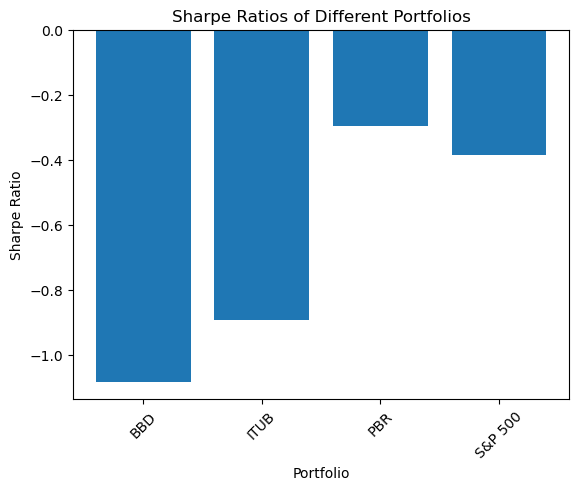

In [236]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios = [-1.082172,-0.892029, -0.297484,-0.386343] 

# Assuming you have a list or array of portfolio names corresponding to the Sharpe ratios
portfolio_names = ['BBD', 'ITUB', 'PBR', 'S&P 500']

# Plotting the bar plot
plt.bar(portfolio_names, sharpe_ratios)
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of Different Portfolios')
plt.xticks(rotation=45)
plt.show()

### How does your portfolio do?

Write your answer here!

BBD has the highest Sharpe ratio among the portfolios, it means that it has the highest risk-adjusted return compared to the other portfolios. 

A higher Sharpe ratio indicates that BBD has generated a higher return relative to its volatility compared to the other portfolios. This suggests that BBD may have provided a better risk-adjusted performance, as it has achieved a higher return for the level of risk taken.

When analiysing S&P 500, it has a lower rolling standard deviation compared to the other portfolios, it indicates that the S&P 500 has exhibited lower volatility or lower variability in returns over the specified rolling time period.

A lower rolling standard deviation suggests that the S&P 500 has experienced relatively smaller fluctuations in returns compared to the other portfolios.

PBR showed a higher volatility compared to the other portfolios, it means that PBR experienced larger fluctuations or variability in its returns over the specified time period.

Higher volatility suggests that PBR's returns were more unpredictable and had a wider range of potential outcomes. This indicates that PBR may have been subject to greater market risk and could have experienced larger price swings compared to the other portfolios.

Investors with a lower risk tolerance may prefer portfolios with lower volatility, as they offer more stability and predictability. However, higher volatility can also present opportunities for potential higher returns for investors who are willing to take on more risk.


